##**[1] 데이터 불러오기**

1.1 파일 업로드하기

In [ ]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving Europe Hotel Booking Satisfaction Score.csv to Europe Hotel Booking Satisfaction Score.csv


1.2 데이터프레임 생성하기

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Europe Hotel Booking Satisfaction Score.csv')
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


## **[2] 탐색적 데이터 분석 및 전처리하기**

2.1 전체적인 데이터 살펴보기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

2.2 결측치 확인하기

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
purpose_of_travel,0
Type of Travel,0
Type Of Booking,0
Hotel wifi service,0
Departure/Arrival convenience,0
Ease of Online booking,0
Hotel location,0


2.3 호텔 와이파이 서비스 항목 설문조사 빈도수 구하기

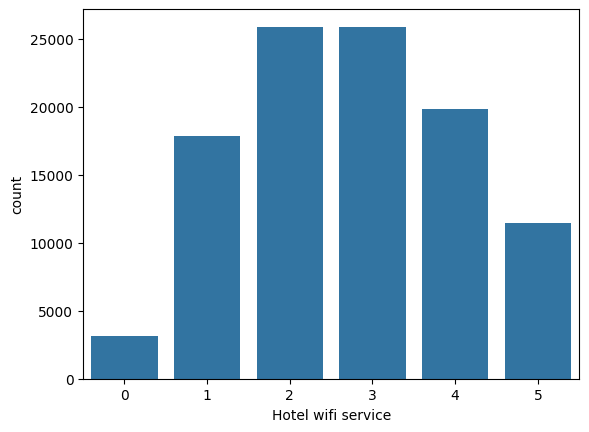

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Hotel wifi service', data=df)
plt.show()

2.4 데이터 속성 상관관계 파악하기

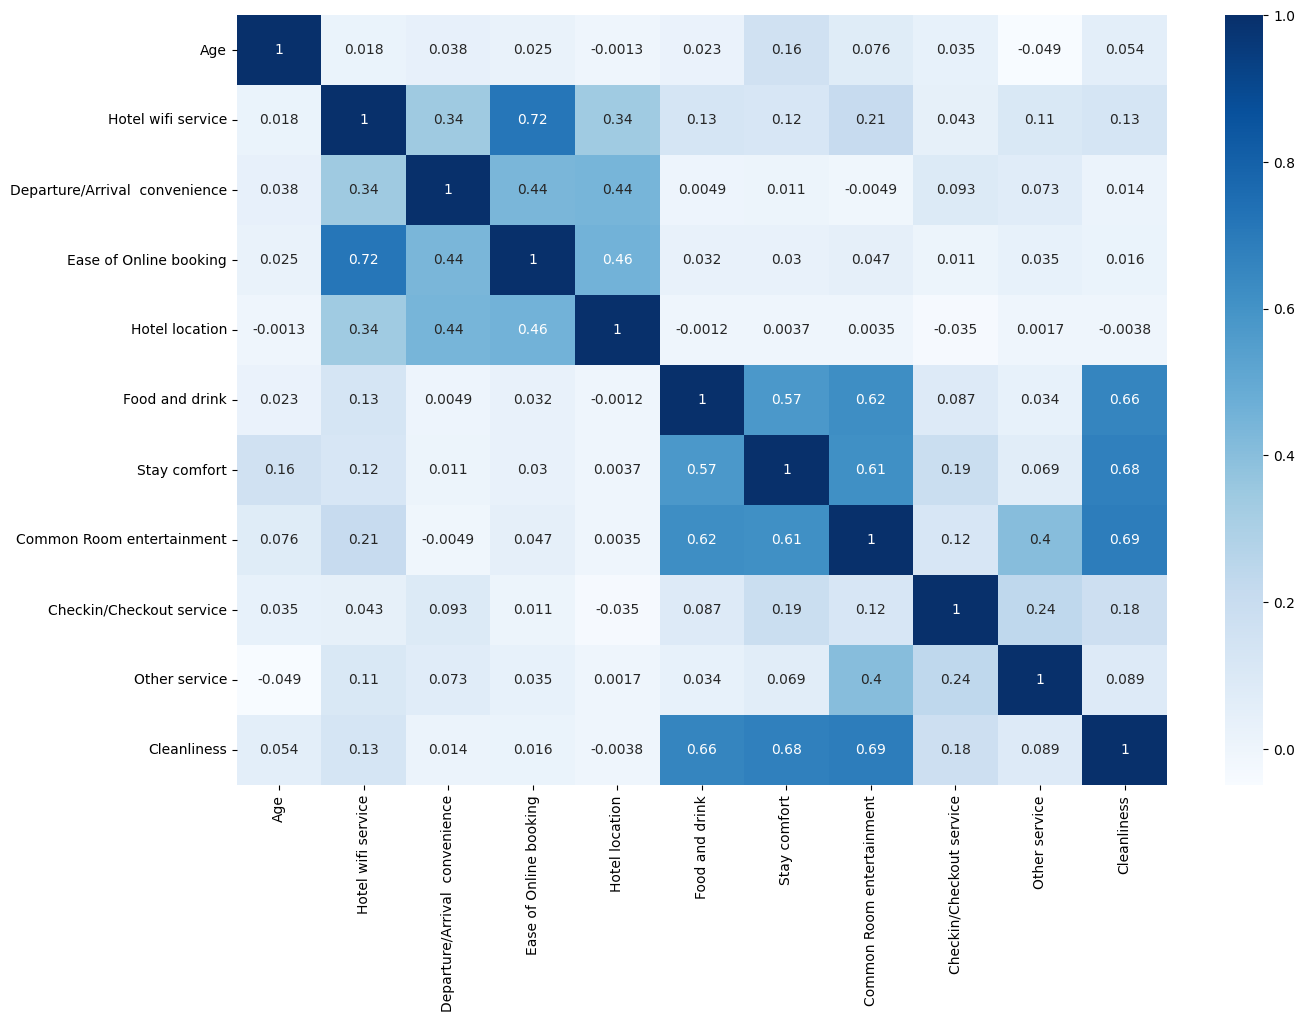

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:, 1:].corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

2.5 특징(feature)과 타겟(target) 설정하기

In [ ]:
X = df.iloc[:, 6:16]
y = df.iloc[:, -1]

2.6 훈련 데이터, 테스트 데이터 분할하기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)

(72732, 10) (72732,)


In [ ]:
print(X_test.shape, y_test.shape)

(31172, 10) (31172,)


## **[3] 모델 생성하기**

3.1 결정트리 모델 학습하기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

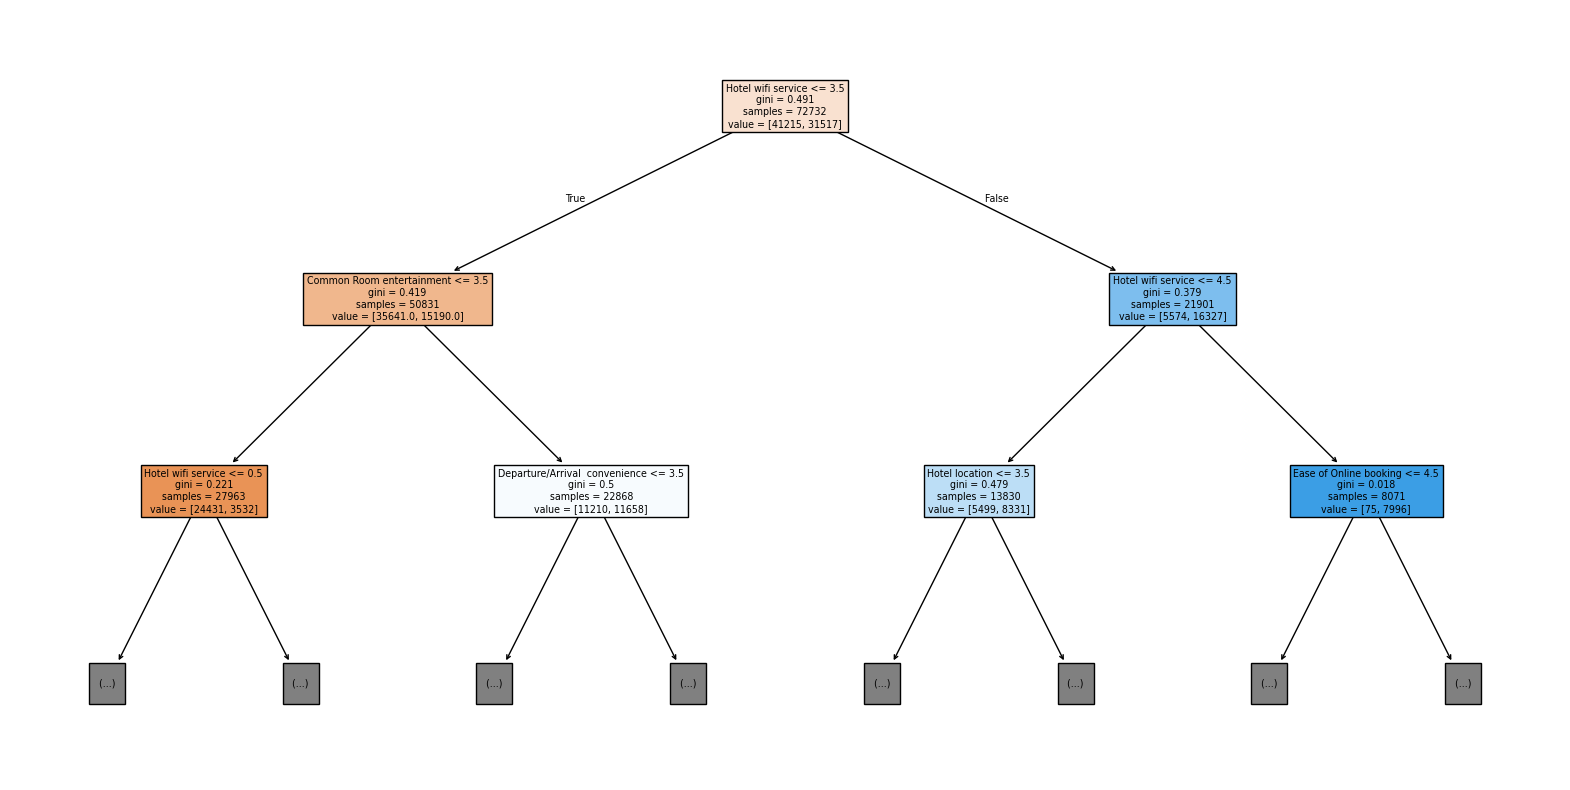

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, max_depth=2, filled=True)
plt.show()

3.2 특징 중요도 구하기

feature importances :  [0.37549456 0.15153413 0.02238337 0.11017998 0.02538075 0.04247048
 0.13209296 0.04365346 0.06574378 0.03106653]


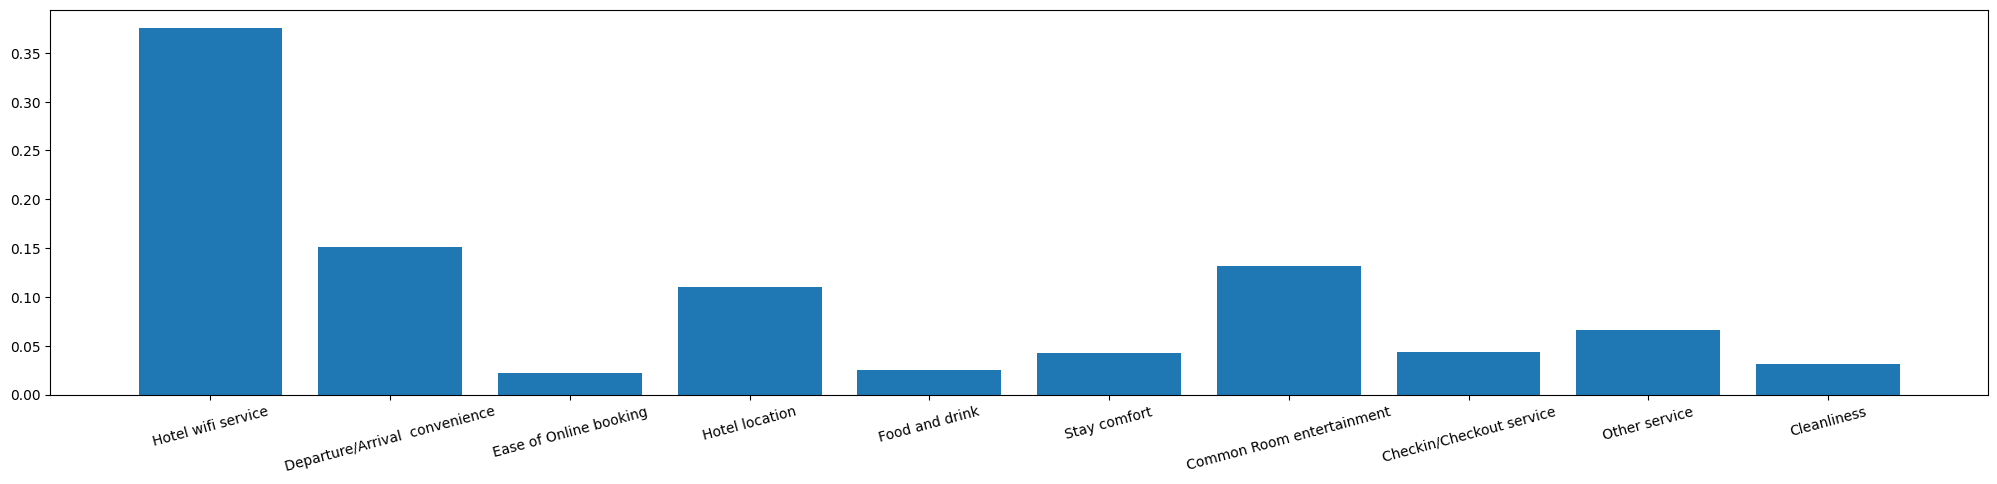

In [ ]:
import numpy as np
print("feature importances : ", model.feature_importances_)

n_features = X_train.shape[1]
plt.figure(figsize=(25,5))
plt.bar(np.arange(n_features), model.feature_importances_)
plt.xticks(np.arange(n_features), df.columns[6:16], rotation=15)
plt.show()

In [ ]:
print("훈련 데이터를 이용한 모델 분류 정확도 : ", model.score(X_train, y_train))

훈련 데이터를 이용한 모델 분류 정확도 :  0.9651597646153


## **[4] 모델 평가 및 예측하기**

4.1 모델 평가하기

In [ ]:
print("테스트 데이터 성능평가 : ", model.score(X_test, y_test))

테스트 데이터 성능평가 :  0.9095983575003208


4.2 테스트 데이터 예측하기

In [ ]:
prediction = model.predict(X_test)
print(prediction[:5])
print(y_test[:5])

['satisfied' 'neutral or dissatisfied' 'neutral or dissatisfied'
 'satisfied' 'satisfied']
97453                  satisfied
84617    neutral or dissatisfied
18032    neutral or dissatisfied
68189                  satisfied
32506                  satisfied
Name: satisfaction, dtype: object


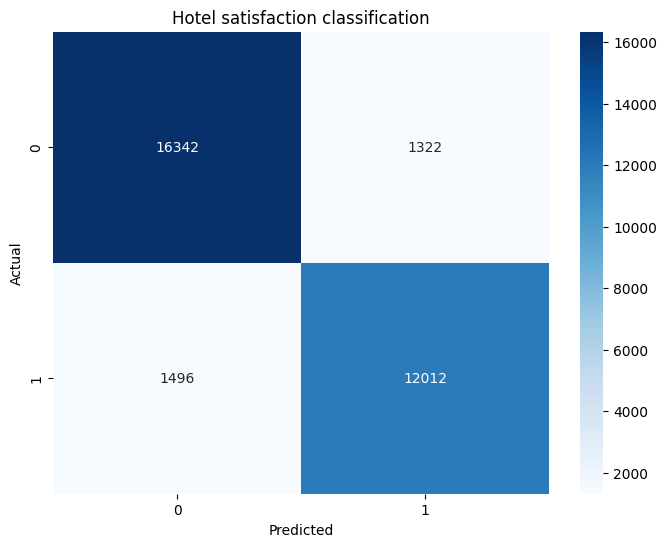

In [ ]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test)
conf = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, cmap='Blues', fmt='d')
plt.title('Hotel satisfaction classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **[5] 모델 활용하기**

5.1 새로운 데이터프레임 생성하기

In [ ]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving hotel_satisfaction_new.csv to hotel_satisfaction_new.csv


In [ ]:
df_new = pd.read_csv('/content/hotel_satisfaction_new.csv')
df_new.head()

,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
0,5,4,5,3,5,5,4,4,4,5
1,1,2,3,2,1,3,3,2,3,2


5.2 새로운 데이터 예측하기

In [ ]:
print(model.predict(df_new))

['satisfied' 'neutral or dissatisfied']


쉽게 배우는 AI지식 : LabelEncoder

In [ ]:
# LabelEncoder 클래스를 임포트함
from sklearn.preprocessing import LabelEncoder

# df 데이터 프레임의 마지막 열을 y0 변수에 저장함
y0 = df.iloc[:, -1]

# LabelEncoder 객체를 생성함
encoder = LabelEncoder()

# LabelEncoder 객체를 사용하여 y0 변수의 값을 레이블 인코딩함
y = encoder.fit_transform(y0)

y    # y 변수의 값을 출력함

array([0, 0, 1, ..., 0, 0, 0])